<h1>Project 3: Shooting</h1>


<h3>TASK 1</h3>

In [1]:
# Necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
# The functions f1 = x''(t) and f2 = x'(x)
f1 = lambda x: (3/2)*x**2
f2 = lambda z: z

In [3]:
n = 1000 # Number of steps
tmax = 1 # Maximum time

# initial conditions
x0 = 4
z0 =tuple(range(-40,-5+1,5))

# step size and discretization of time
h = tmax/n 
t = [i*h for i in range(n+1)] 

In [4]:
# Runge-Kutta 4th order method
def RK4(f1,f2,x0,z0,h):
    x,z = [x0],[z0]
            
    for i in range(n):
        k1 = f1(x[i])
        l1 = f2(z[i])
        
        k2 = f1(x[i]+k1*h/2)
        l2 = f2(z[i]+l1*h/2)
        
        k3 = f1(x[i]+k2*h/2)
        l3 = f2(z[i]+l2*h/2)
        
        k4 = f1(x[i]+k3*h)
        l4 = f2(z[i]+l3*h) 
    
        z.append(z[i]+(k1+2*k2+2*k3+k4)*h/6)
        x.append(x[i]+(l1+2*l2+2*l3+l4)*h/6)
    return x,z

In [5]:
# Data
x,z = [],[]
for j in range(len(z0)):
    x_list, z_list = RK4(f1, f2, x0, z0[j], h)

    x.append(x_list)
    z.append(z_list)

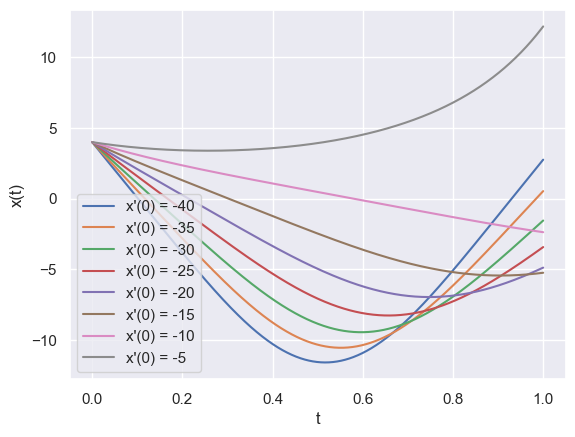

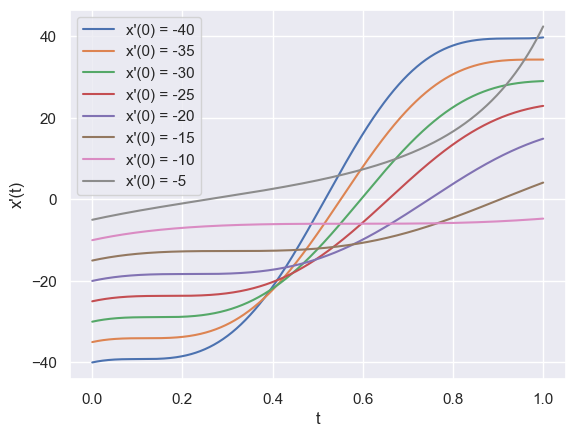

In [6]:
# x(t) data plot
for i in range(len(z0)): 
    sns.lineplot(x=t, y=x[i], label=f"x'(0) = {z0[i]}")
    
# labels and title
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(loc=3)
plt.show()

# x'(t) data plot
for i in range(len(z0)): 
    sns.lineplot(x=t, y=z[i], label=f"x'(0) = {z0[i]}")

# labels and title
plt.xlabel('t')
plt.ylabel('x\'(t)')
plt.legend()
plt.show()

<h3>TASK 2</h3>

In [7]:
# Root finding method
def modRegulaFalsi(f, xl, xu, accuracy, i_num, rescaling=0.5, counter_limit=2, data_export=False):
    """
    Regula falsi also known as false position, is a numerical analysis
    method for finding the root of a function within an interval.
    This is a modified version known as Illinois algorithm.

    Parameters:
        f (function):
            The function for root finding. 
        xl (float):
            The lower bound of the interval.
        xu (float):
            The upper bound of the interval.
        accuracy (int):
            The number of significant figures.
        i_num (int):
            The maximum interation number.
        rescaling (float):
            This is a parameter that down-weighting one
            of the endpoint values to force the retained 
            endpoint y-value to change. rescaling ∈ (0,1].
        counter_limit (int): Couter limite before rescaling.
        data_export (bool): 
            If True, returns data in each iteration,
            if False, returns only the convergen.

    Returns:
        (generator): Returns a tuple which contains:
            - iteration number,
            - lower bound,
            - root approximation,
            - upper bound,
            - relative error,
            - tolerance
    """

    # Necessary library
    import math

    # Parameter
    eps = 0.5*10**-accuracy

    # Initial values
    fxl = f(xl)
    fxu = f(xu)
    cu = 0
    cl = 0

    # Iteration
    for i in range(1,i_num+1):
        # New xr
        xr = (xl*fxu - xu*fxl)/(fxu-fxl)
        fxr = f(xr)

        # Convergence criterion
        if f(xr) == 0:
            yield i,xl,xr,xu,0,eps
            break
        elif i>1 and xr!=0 and abs((xr - old_xr)/xr) < eps:
            yield i,xl,xr,xu,abs((xr - old_xr)/xr),eps
            break

        # Data export
        if data_export == True:
            if i>1 and xr==0 : yield i,xl,xr,xu,math.inf,eps
            elif i>1: yield i,xl,xr,xu,abs((xr - old_xr)/xr),eps
            else: yield i,xl,xr,xu,math.nan,eps

        # New edge    
        if f(xl)*f(xr) < 0: 
            xu = xr
            fxu = f(xu)
            cu = 0
            cl += 1
            if cl >= counter_limit: fxl *= rescaling
        else: 
            xl = xr
            fxl = f(xl)
            cl = 0
            cu += 1
            if cu >= counter_limit: fxu *= rescaling

        # Save xr
        old_xr = xr
    else:
        print('Not Convergent.')

In [8]:
# Definition of F
F = lambda z0: RK4(f1,f2,x0,z0,h)[0][-1]

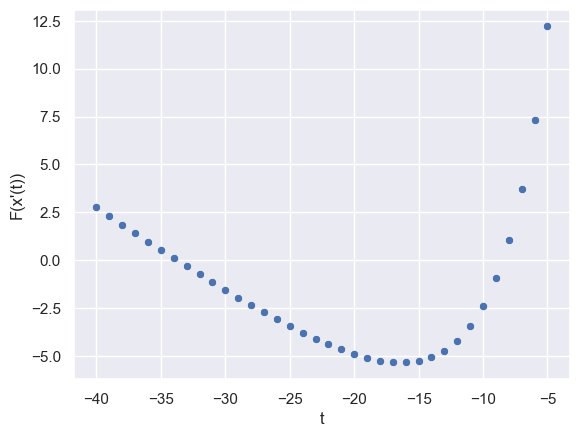

In [9]:
# discretization of velocity (x'(t))
x_dot = range(-40,-5+1,1)

# position values for t=1 (x(1))
x1 = [F(i) for i in x_dot]

# data visualization
sns.scatterplot(x=x_dot, y=x1)
plt.xlabel('t')
plt.ylabel('F(x\'(t))')
plt.show()

In [10]:
# Roots of F
r1 = list(modRegulaFalsi(F, -40, -15, 5, 10^3))[0][2]
r2 = list(modRegulaFalsi(F, -15, -5, 5, 10^3))[0][2]

roots = [r1, r2]

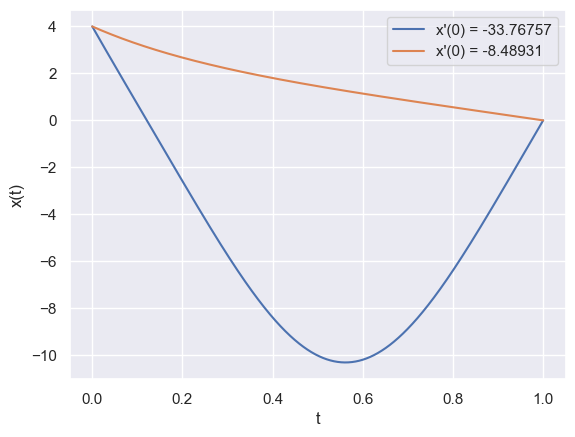

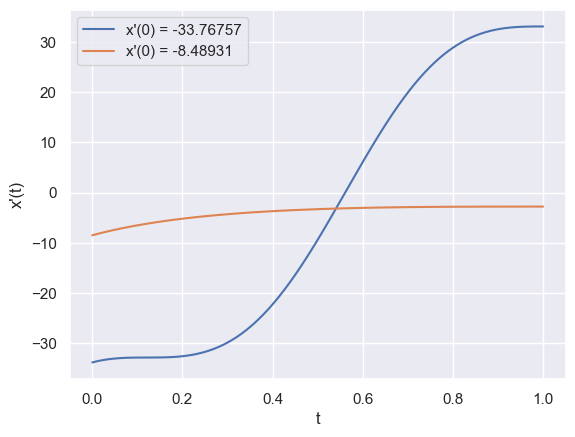

In [11]:
# Data
xr,zr = [],[]
for j in range(len(roots)):
    x_list, z_list = RK4(f1, f2, x0, roots[j], h)

    xr.append(x_list)
    zr.append(z_list)

# x(t) data plot
for i in range(len(roots)): 
    sns.lineplot(x=t, y=xr[i], label=f"x'(0) = {round(roots[i],5)}")
    
# labels and title
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# x'(t) data plot
for i in range(len(roots)): 
    sns.lineplot(x=t, y=zr[i], label=f"x'(0) = {round(roots[i],5)}")

# labels and title
plt.xlabel('t')
plt.ylabel('x\'(t)')
plt.legend()
plt.show()

<h3>TASK 3</h3>

In [12]:
# Necessary libraries
import numpy as np
from scipy.integrate import solve_bvp

In [13]:
# discretization of time
t_mesh = np.linspace(0, 1, 5)

In [14]:
# functions
def fun(x, y):
    return np.vstack((y[1], (3/2)*y[0]**2))

# boundary condition
def bc(ya, yb):
    return np.array([ya[0]-4, yb[0]])

In [15]:
# initial guess
y_a = np.zeros((2, t_mesh.size))
y_b = np.zeros((2, t_mesh.size))

y_b[0] = -10

In [16]:
# solutions
res_a = solve_bvp(fun, bc, t_mesh, y_a)
res_b = solve_bvp(fun, bc, t_mesh, y_b)

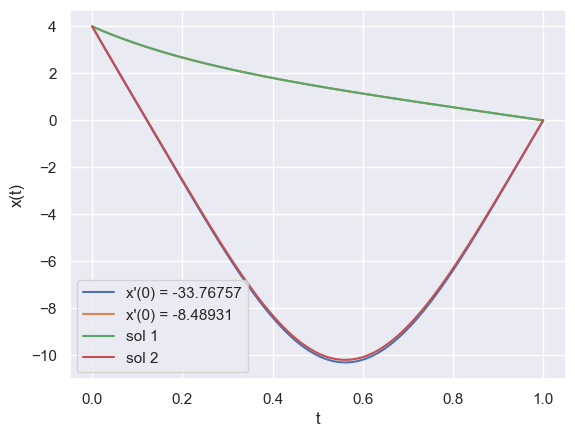

In [17]:
x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]

# x(t) data plot
for i in range(len(roots)): 
    sns.lineplot(x=t, y=xr[i], label=f"x'(0) = {round(roots[i],5)}")

sns.lineplot(x=x_plot, y=y_plot_a, label='sol 1')
sns.lineplot(x=x_plot, y=y_plot_b, label='sol 2')

# labels and title
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(loc=3)
plt.show()